# Fadhil Ali Alsahlanee - Dr.Beaman's Project (MASTER File) #
# ME_REPORT Analysis #

In [1]:
import os
cwd = os.path.abspath('')
files = os.listdir(cwd)
import pandas as pd
import matplotlib
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from pylab import rcParams
import seaborn as sb
from datetime import date
import re
%matplotlib inline
rcParams['figure.figsize'] = 10,10
rcParams['font.size'] = 15
sb.set_style('whitegrid')

# READ the DATA from ME_Report_Master #

In [2]:
df_master = pd.DataFrame()
for file in files:                         
    if file.endswith('.xlsx'):
        excel_file = pd.ExcelFile(file)
        sheets = excel_file.sheet_names
        for sheet in sheets:               
            df = excel_file.parse(sheet_name = sheet)
            df_master = df_master.append(df)            
            
df_master.drop_duplicates(subset=["CaseNumber"], keep="first", inplace=True) #<<<< remove any unwanted duplicates
df_master.to_excel('MasterFile.xlsx')

In [3]:
overdose = pd.read_excel('MasterFile.xlsx',parse_dates=True)# <<<< DATA SOURCE FILE 
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
overdose.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
overdose.head()

Unnamed: 0  CaseNumber                 Name  \
0           0     2005459        LOUIS  TARVER   
1           1     1905991   JOSEPH FRANK BOURG   
2           2     1903658      KIMBERLY  DAVIS   
3           3     1904314      EVERETT  DODSON   
4           4     2000486  JESSIE GRACE DYGERT   

                                Home Address Age           Birth Date   Race  \
0       3154 EAST WOODROW STREET, TULSA , OK  73             01/18/47  BLACK   
1   6938 HULSEY PRAIRIE ROAD, WILBURTON , OK  57  1962-08-05 00:00:00  WHITE   
2           30101 NORTH STREET, BOKOSHE , OK  55             01/24/64  WHITE   
3                3050 S 439 ROAD, PRYOR , OK  86             12/19/32  WHITE   
4           812 SOUTH HICKORY, SHATTUCK , OK  13  2006-10-13 00:00:00  WHITE   

  Sex                             Examiner Notified By        Notified Date  \
0   M  OFFICER BENJAMIN KEENER-TULSA POLICE DEPARTMENT             10/02/20   
1   M                LA DONNA- LATIMER COUNTY DISPATCH  2019-11-30 00:00:00   
2   F        ANDREA WALDEN - EASTERN OK MEDICAL CENTER             07/27/19   
3   M                      APRYL MCGILL- HILLCREST ICU             08/31/19   
4   F                    SHANE BOOTH,  ELLIS COUNTY SO  2020-01-29 00:00:00   

  Notified Time Injured or Became Ill At (IBIA)  IBIA City IBIA County  \
0         19:58        3154 EAST WOODROW STREET      TULSA       TULSA   
1      23:53:00        6938 HULSEY PRAIRIE ROAD  WILBURTON     LATIMER   
2         14:57       EASTERN OK MEDICAL CENTER     POTEAU     LEFLORE   
3         17:45                 3050 S 439 ROAD      PRYOR       MAYES   
4      05:00:00    LAT 36.2730   LONG. -99.8880   SHATTUCK       ELLIS   

  IBIA State IBIA Type of Premises            IBIA Date IBIA Time  \
0         OK             RESIDENCE                  NaN       NaN   
1         OK             RESIDENCE                  NaN       NaN   
2         OK              HOSPITAL             07/27/19       NaN   
3         OK             RESIDENCE             08/13/19       NaN   
4         OK        RailroadTracks  2020-01-29 00:00:00  04:15:00   

         Location of Death (LOD)   LOD City LOD County    LOD Premises  \
0       3154 EAST WOODROW STREET      TULSA      TULSA       RESIDENCE   
1       6938 HULSEY PRAIRIE ROAD  WILBURTON    LATIMER       RESIDENCE   
2      EASTERN OK MEDICAL CENTER     POTEAU    LEFLORE        HOSPITAL   
3                  HILLCREST ICU      TULSA      TULSA        HOSPITAL   
4   LAT 36.2730   LONG. -99.8880   SHATTUCK      ELLIS  RailroadTracks   

              LOD Date  LOD Time Body Viewed by Medical Examiner (BVBME)  \
0             10/02/20     19:28                   1115 WEST 17TH STREET   
1  2019-11-30 00:00:00  23:45:00                   1115 WEST 17TH STREET   
2             07/27/19     14:31                   1115 WEST 17TH STREET   
3             08/31/19     17:25                  NOT VIEWED- PAPER CASE   
4  2020-01-29 00:00:00  04:15:00                             921 NE 23RD   

      BVBME City BVBME County BVBME Premises           BVBME Date BVBME Time  \
0          TULSA        TULSA  AUTOPSY SUITE             10/03/20      12:15   
1          TULSA        TULSA  AUTOPSY SUITE  2019-12-01 00:00:00   12:15:00   
2          TULSA        TULSA  AUTOPSY SUITE             07/28/19      09:26   
3            NaN          NaN            NaN                  NaN        NaN   
4  OKLAHOMA CITY     OKLAHOMA    AUTOPSY LAB  2020-01-30 00:00:00   08:30:00   

   Vehicle Accident - Driver  Passenger  Pedestrian  Automobile  Light Truck  \
0                      False      False       False       False        False   
1                      False      False       False       False        False   
2                      False      False       False       False        False   
3                      False      False       False       False        False   
4                      False      False       False       False        False   

   Heavy Truck  Bicycl

# DATA PREPARATION#
# REMOVE THE UNWANTED COLUMNS (REDLINED COLUMNS)#

In [4]:

overdose.drop(['Unnamed: 0','Home Address','CaseNumber','Name','Birth Date','Examiner Notified By','Injured or Became Ill At (IBIA)','IBIA Type of Premises','IBIA Time','Location of Death (LOD)','LOD Premises','LOD Time','Vehicle Accident - Driver', 'Passenger','Pedestrian','Automobile','Light Truck','Heavy Truck','Bicycle','Motorcycle','External Observation (EO) - Clothed','Significant Observations and Injury', 
'Age','Notified Date','Notified Time','BVBME City','BVBME County','BVBME Premises','BVBME Date','BVBME Time','Other Vehicle','Rigor Jaw', 'Rigor Neck', 'Rigor Arms','Rigor Legs','Rigor Abdomen','Rigor Complete','Rigor Absent','Rigor Passing','Rigor Passed','Rigor Decomposed','Livor Color','Livor Color Lateral','Livor Color Posterior','Livor Color Anterior','Livor Color Reginal','EO Partly Clothed',
'EO Unclothed','EO Beard','EO Hair','EO Mustache','EO Eyes: Color','EO Pupils Right','EO Pupils Left','EO Body Length',
'EO Body Weight','EO Blood Nose','EOOtherNose','EO Blood Mouth','EOOtherMouth','EO Blood Ears','EOOtherEars','EO Other',
'Autopsy','Autopsy Authorized By','Pathologist','Medical Examer','Not OCME Case','FullCaseAvailableOn',
'Body Viewed by Medical Examiner (BVBME)','Manner Of Death (MOD) - Natural','MOD Suicide','MOD Unknown', 'MOD Homicide',
'MOD Pending','MOD NotAssigned','Date Initiated','Date Finalized','Tox - Date Recieved','Tox - Notes',
'Tox - Ethyl Alcohol - Blood','Tox - Ethyl Alcohol - Vitreous','Tox - Ethyl Alcohol - Other','Carbon Monoxide',
'Tox Tests Performed','Toxicologist'],axis=1,inplace=True)
overdose.head(10)

Race Sex  IBIA City IBIA County IBIA State            IBIA Date  \
0  BLACK   M      TULSA       TULSA         OK                  NaN   
1  WHITE   M  WILBURTON     LATIMER         OK                  NaN   
2  WHITE   F     POTEAU     LEFLORE         OK             07/27/19   
3  WHITE   M      PRYOR       MAYES         OK             08/13/19   
4  WHITE   F   SHATTUCK       ELLIS         OK  2020-01-29 00:00:00   
5  WHITE   F      KIOWA   PITTSBURG         OK                  NaN   
6  WHITE   F      TULSA       TULSA         OK             10/17/19   
7  WHITE   M   MANNFORD       CREEK         OK             06/07/19   
8  WHITE   M      CACHE    COMANCHE         OK             09/02/19   
9  WHITE   F   COALGATE        COAL         OK             05/12/19   

    LOD City LOD County             LOD Date  \
0      TULSA      TULSA             10/02/20   
1  WILBURTON    LATIMER  2019-11-30 00:00:00   
2     POTEAU    LEFLORE             07/27/19   
3      TULSA      TULSA             08/31/19   
4   SHATTUCK      ELLIS  2020-01-29 00:00:00   
5  MCALESTER  PITTSBURG             10/01/19   
6      TULSA      TULSA             10/28/19   
7      TULSA      TULSA             06/07/19   
8      CACHE   COMANCHE             09/02/19   
9   COALGATE       COAL             05/12/19   

                             Probable Cause of Death  \
0  HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DI...   
1                                           ASPHYXIA   
2             ATHEROSCLEROTIC CARDIOVASCULAR DISEASE   
3                                             SEPSIS   
4                      MULTIPLE BLUNT FORCE INJURIES   
5                           ACUTE PULMONARY EMBOLISM   
6  COMPLICATIONS OF RIGHT FEMUR AND RIGHT HUMERUS...   
7                              GUNSHOT WOUND OF HEAD   
8             GUNSHOT WOUND TO THE HEAD, PERFORATING   
9                           METHAMPHETAMINE TOXICITY   

                                      Cause Due To 1  \
0                                                NaN   
1        CARBON MONOXIDE (SMOKE AND SOOT INHALATION)   
2                                                NaN   
3                  COLONIC PERFORATION AND PNEUMONIA   
4                                                NaN   
5  DEEP VEIN THROMBOSIS OF LEFT POSTERIOR TIBIAL ...   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                      Cause Due To 2 Cause Due To 3  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3  COLONIC ISCHEMIA, CECAL VOLVULUS, AND TRAUMATI...            NaN   
4                                                NaN            NaN   
5                                                NaN            NaN   
6                                                NaN            NaN   
7                                                NaN            NaN   
8                                                NaN            NaN   
9                                                NaN            NaN   

                Other Significant Medical Conditions  MOD Accident  \
0                                                NaN         False   
1                                   THERMAL INJURIES          True   
2                                                NaN         False   
3  CHRONIC OBSTRUCTIVE PULMONARY DISEASE, CONGEST...          True   
4                                                NaN         False   
5                                            OBESITY         False   
6  HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DI...          True   
7                                                NaN         False   
8                                              

# Ensure & Remove no null values (NaN) in the data# 
***Check for NaN and remove it: False means NaN values are removed) -while True still have it-***

In [5]:
overdose['IBIA City'].fillna(0,inplace=True)
overdose['IBIA County'].fillna(0,inplace=True)
overdose['IBIA State'].fillna(0,inplace=True)
overdose['IBIA Date'].fillna(0,inplace=True)
overdose['Cause Due To 1'].fillna(0,inplace=True)
overdose['Cause Due To 2'].fillna(0,inplace=True)
overdose['Cause Due To 3'].fillna(0,inplace=True)
overdose['Other Significant Medical Conditions'].fillna(0,inplace=True)
overdose['Tox Results'].fillna(0,inplace=True)
overdose['Toxicology (Tox) -  Material Submitted'].fillna(0,inplace=True)
overdose['Tox Date Completed'].fillna(0,inplace=True)
overdose.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
overdose.isna().any()

Race                                      False
Sex                                       False
IBIA City                                 False
IBIA County                               False
IBIA State                                False
IBIA Date                                 False
LOD City                                  False
LOD County                                False
LOD Date                                  False
Probable Cause of Death                   False
Cause Due To 1                            False
Cause Due To 2                            False
Cause Due To 3                            False
Other Significant Medical Conditions      False
MOD Accident                              False
Toxicology (Tox) -  Material Submitted    False
Tox Results                               False
Tox Date Completed                        False
dtype: bool

In [6]:
overdose.pop("Toxicology (Tox) -  Material Submitted")
overdose.head(100)

Race Sex      IBIA City IBIA County IBIA State            IBIA Date  \
0      BLACK   M          TULSA       TULSA         OK                    0   
1      WHITE   M      WILBURTON     LATIMER         OK                    0   
2      WHITE   F         POTEAU     LEFLORE         OK             07/27/19   
3      WHITE   M          PRYOR       MAYES         OK             08/13/19   
4      WHITE   F       SHATTUCK       ELLIS         OK  2020-01-29 00:00:00   
5      WHITE   F          KIOWA   PITTSBURG         OK                    0   
6      WHITE   F          TULSA       TULSA         OK             10/17/19   
7      WHITE   M       MANNFORD       CREEK         OK             06/07/19   
8      WHITE   M          CACHE    COMANCHE         OK             09/02/19   
9      WHITE   F       COALGATE        COAL         OK             05/12/19   
10     WHITE   F          ALTUS     JACKSON         OK                    0   
11     WHITE   M     PONCA CITY         KAY         OK             04/27/20   
12     WHITE   M  MEDICINE PARK    COMANCHE         OK                    0   
13     WHITE   M         MARLOW    STEPHENS         OK             09/23/19   
14     WHITE   F         DUNCAN    STEPHENS         OK  2020-01-18 00:00:00   
15  AmINDIAN   F       FAIRVIEW       MAJOR         OK  2020-01-26 00:00:00   
16     WHITE   F       FAIRVIEW       MAJOR         OK  2020-01-26 00:00:00   
17     WHITE   M      CHICKASHA       GRADY         OK             08/27/19   
18     WHITE   M       ELK CITY     BECKHAM         OK             05/23/20   
19     WHITE   M    CHATTANOOGA    COMANCHE         OK             07/19/19   
20     WHITE   F        LOOKEBA       CADDO         OK             05/11/20   
21  AmINDIAN   M  MOUNTAIN VIEW       KIOWA         OK             09/08/19   
22     WHITE   F         GUYMON       TEXAS         OK             06/21/19   
23  AmINDIAN   M       FLETCHER    COMANCHE         OK                    0   
24     WHITE   M        SULPHUR      MURRAY         OK             11/17/19   
25     WHITE   M        COLBERT       BRYAN         OK             08/07/19   
26     WHITE   M          ATOKA       ATOKA         OK                    0   
27     WHITE   F         FORGAN      BEAVER         OK             09/12/19   
28  AmINDIAN   M         MARLOW    STEPHENS         OK             06/22/20   
29     WHITE   M           ALEX       GRADY         OK             05/31/19   
30     WHITE   M          ALTUS     JACKSON         OK             09/23/19   
31     WHITE   M   RUSH SPRINGS       GRADY         OK             10/14/19   
32  AmINDIAN   M  OKLAHOMA CITY    OKLAHOMA         OK                    0   
33     WHITE   M   RUSH SPRINGS       GRADY         OK             05/21/19   
34     WHITE   M           DUKE     JACKSON         OK             06/24/20   
35     WHITE   M          ROCKY       KIOWA         OK             07/08/19   
36     WHITE   M       SEMINOLE    SEMINOLE         OK             08/05/19   
37     WHITE   M      HOLLISTER     TILLMAN         OK             11/25/19   
38     WHITE   M        CHESTER       MAJOR         OK             06/29/19   
39     WHITE   M         DUNCAN    STEPHENS         OK             06/01/19   
40     WHITE   F        WETUMKA      HUGHES         OK             12/06/19   
41  HISPANIC   M           ALVA       WOODS         OK                    0   
42     WHITE   M       WELLSTON     LINCOLN         OK             09/03/19   
43     WHITE   M       ELK CITY     BECKHAM         OK                    0   
44     BLACK   M         LAWTON    COMANCHE         OK                    0   
45  AmINDIAN   M        CLINTON      CUSTER         OK             07/14/19   
46     WHITE   M      TAHLEQUAH    CHEROKEE         OK             09/08/19   
47  AmINDIAN   M          BUNCH       ADAIR         OK                    0   
48     WHITE   F           AGRA     LINCOLN         OK             12/29/19   
49     WHITE   M          MINCO       CADDO         OK    

In [7]:
overdose.groupby("Tox Results").size().reset_index(name="count")

Tox Results  count
0                                                     0   2415
1     \r\nOpiates, Benzodiazepine, and Fentanyl Clas...      1
2     10-HYDROXYCARBAZEPINE\r\n   100 mcg/mL - (Femo...      1
3     10-HYDROXYCARBAZEPINE \r\n   44 mcg/mL - (Femo...      1
4     10-HYDROXYCARBAZEPINE - 43 mcg/mL - (Femoral B...      1
5     ACETAMINOPHEN\r\n   115 mcg/mL - (Hospital Blo...      1
6     ACETAMINOPHEN - Detected (not confirmed) - (He...      1
7     ACETAMINOPHEN - Detected (not confirmed) - (Li...      1
8     ACETONE\r\n    32 mg/dL - (Heart Blood)\r\n   ...      1
9     ACETONE\r\n   19 mg/dL - (Heart Blood)  \r\n  ...      1
10    ACETONE\r\n   20 mg/dL - (Heart Blood)  \r\n  ...      1
11    ACETONE\r\n   20 mg/dL - (Heart Blood)  \r\n  ...      1
12    ACETONE\r\n   20 mg/dL - (Heart Blood)  \r\n  ...      1
13    ACETONE\r\n   21 mg/dL - (Heart Blood)  \r\n  ...      1
14               ACETONE\r\n   22 mg/dL - (Heart Blood)      1
15    ACETONE\r\n   22 mg/dL - (Heart Blood)  \r\n  ...      1
16    ACETONE\r\n   24 mg/dL - (Heart Blood)  \r\n  ...      1
17    ACETONE\r\n   24 mg/dL - (Urine) \r\n\r\nNORDI...      1
18    ACETONE\r\n   25 mg/dL - (Heart Blood)\r\n   5...      1
19    ACETONE\r\n   25 mg/dL - (Heart Blood)  \r\n  ...      1
20    ACETONE\r\n   25 mg/dL - (Heart Blood)  \r\n  ...      1
21    ACETONE\r\n   25 mg/dL - (Heart Blood)  \r\n  ...      1
22    ACETONE\r\n   26 mg/dL - (Heart Blood)  \r\n  ...      1
23    ACETONE\r\n   26 mg/dL - (Lifeshare Blood A; 9...      1
24    ACETONE\r\n   27 mg/dL - (Femoral Blood) \r\n ...      1
25    ACETONE\r\n   27 mg/dL - (Femoral Blood) \r\n ...      1
26    ACETONE\r\n   27 mg/dL - (Heart Blood)  \r\n  ...      1
27    ACETONE\r\n   29 mg/dL - (Heart Blood)  \r\n  ...      1
28               ACETONE\r\n   30 mg/dL - (Heart Blood)      1
29    ACETONE\r\n   30 mg/dL - (Heart Blood)  \r\n  ...      1
30    ACETONE\r\n   30 mg/dL - (Heart Blood)  \r\n  ...      1
31    ACETONE\r\n   30 mg/dL - (Heart) \r\n   37 mg/...      1
32    ACETONE\r\n   30 mg/dL - (Heart) \r\n   40 mg/...      1
33    ACETONE\r\n   31 mg/dL - (Heart Blood)  \r\n  ...      1
34    ACETONE\r\n   31 mg/dL - (Heart Blood)  \r\n  ...      1
35    ACETONE\r\n   32 mg/dL - (Heart Blood)  \r\n\r...      1
36    ACETONE\r\n   32 mg/dL - (Heart Blood)  \r\n  ...      1
37    ACETONE\r\n   34 mg/dL - (Heart Blood)  \r\n  ...      1
38    ACETONE\r\n   35 mg/dL - (Femoral Blood) \r\n ...      1
39    ACETONE\r\n   36 mg/dL (Heart Blood)\r\n   38 ...      1
40    ACETONE\r\n   37 mg/dL - (Femoral Blood) \r\n ...      1
41    ACETONE\r\n   37 mg/dL - (Heart Blood)  \r\n  ...      1
42    ACETONE\r\n   38 mg/dL - (Heart) \r\n   62 mg/...      1
43    ACETONE\r\n   39 mg/dL - (Heart Blood)  \r\n  ...      1
44    ACETONE\r\n   39 mg/dL - (Heart Blood)  \r\n  ...      1
45             ACETONE\r\n   41 mg/dL - (Femoral Blood)      1
46    ACETONE\r\n   41 mg/dL - (Heart Blood)  \r\n  ...      1
47    ACETONE\r\n   41 mg/dL - (Heart Blood)  \r\n  ...      1
48    ACETONE\r\n   42 mg/dL - (Heart) \r\n   39 mg/...      1
49    ACETONE\r\n   43 mg/dL - (Heart Blood)  \r\n  ...      1
50    ACETONE\r\n   45 mg/dL - (Heart Blood)  \r\n  ...      1
51    ACETONE\r\n   46 mg/dL - (Heart Blood)  \r\n  ...      1
52    ACETONE\r\n   46 mg/dL - (Heart Blood)  \r\n  ...      1
53    ACETONE\r\n   48 mg/dL - (Heart Blood)  \r\n  ...      1
54    ACETONE\r\n   49 mg/dL - (Femoral Blood)\r\n  ...      1
55    ACETONE\r\n   49 mg/dL - (Heart Blood)  \r\n  ...      1
56    ACETONE\r\n   49 mg/dL - (Heart Blood)  \r\n  ...      1
57    ACETONE\r\n   51 mg/dL - (Heart Blood)  \r\n  ...      1
58    ACETONE\r\n   54 mg/dL - (Heart Blood)  \r\n  ...      1
59    ACETONE\r\n   56 mg/dL - (Heart Blood)  \r\n  ...      1
60    ACETONE\r\n   56 mg/dL - (Hospital Blood A) \r...      1
61    ACETONE\r\n   60 mg/dL - (Heart Blood)  \r\n  ...      1
62    ACETONE\r\n   63 mg/dL - (Heart Blood)  \r\n  ...      1
63    ACETON

In [8]:
overdose.groupby(["Cause Due To 1", "Cause Due To 2", "Cause Due To 3","Tox Results"]).size()

Cause Due To 1                                                                  Cause Due To 2                                                         Cause Due To 3                                                   Tox Results                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Total Number of MOD Accident (Overdoses= True) ##

In [9]:
overdose['MOD Accident'].value_counts(dropna=True)

False    4642
True     3279
Name: MOD Accident, dtype: int64

In [10]:
overdose['Cause Due To 1'].value_counts(dropna=True)

0                                                                                 6425
FALL                                                                               274
MOTOR VEHICLE COLLISION                                                             94
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                 75
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                 43
MOTOR VEHICLE ACCIDENT                                                              29
HYPERTENSION                                                                        21
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                             21
PNEUMONIA                                                                           17
APPARENT FALL                                                                       16
LIGATURE HANGING                                                                    16
ATHEROSCLEROTIC CARDIOVASCULAR DISEASE     

In [11]:
overdose['Cause Due To 2'].value_counts(dropna=True)

0                                                                        7756
FALL                                                                       18
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                     7
ATHEROSCLEROTIC CORONARY ARTERY DISEASE                                     3
CHRONIC ALCOHOLISM                                                          3
CHRONIC KIDNEY DISEASE SEQUELA                                              3
DIABETES MELLITUS SEQUELA                                                   3
MOTOR VEHICLE COLLISION                                                     3
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                         2
CHRONIC ETHANOL ABUSE                                                       2
HEPATIC CIRRHOSIS                                                           2
ATHEROSCLEROTIC HEART DISEASE                                               2
ICE AND STRIKING POWER LINE(S)                                  

In [12]:
overdose['Cause Due To 3'].value_counts(dropna=True)

0                                                                  7897
FALL                                                                  4
MOTOR VEHICLE COLLISION                                               2
HYPERTENSIVE CARDIOVASCULAR DISEASE                                   2
CHRONIC ETHANOL ABUSE                                                 2
ATHEROSCLEROTIC HYPERTENSIVE CARDIOVASCULAR DISEASE                   1
ATHEROSCLEROTIC HEART DISEASE                                         1
TRACTOR ACCIDENT                                                      1
FALL (6/1/2020)                                                       1
RUPTURED LARGE ANTERIOR COMMUNICATING CEREBRAL ANEURYSM SEQUELA       1
TRAUMATIC RIGHT FEMUR FRACTURE                                        1
PERIPHERAL VASCULAR DISEASE                                           1
FALL (S)                                                              1
INJURED BY TIRE MACHINE AT WORK                                 

In [13]:
overdose['Tox Results'].value_counts(dropna=True)

NONE DETECTED                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               2873
0                                                                                                                                                                                      

In [14]:
overdose.groupby(["MOD Accident", "Cause Due To 1", "Cause Due To 2", "Cause Due To 3","Tox Results"]).size().reset_index(name='count')

MOD Accident                                     Cause Due To 1  \
0            False                                                  0   
1            False                                                  0   
2            False                                                  0   
3            False                                                  0   
4            False                                                  0   
5            False                                                  0   
6            False                                                  0   
7            False                                                  0   
8            False                                                  0   
9            False                                                  0   
10           False                                                  0   
11           False                                                  0   
12           False                                                  0   
13           False                                                  0   
14           False                                                  0   
15           False                                                  0   
16           False                                                  0   
17           False                                                  0   
18           False                                                  0   
19           False                                                  0   
20           False                                                  0   
21           False                                                  0   
22           False                                                  0   
23           False                                                  0   
24           False                                                  0   
25           False                                                  0   
26           False                                                  0   
27           False                                                  0   
28           False                                                  0   
29           False                                                  0   
30           False                                                  0   
31           False                                                  0   
32           False                                                  0   
33           False                                                  0   
34           False                                                  0   
35           False                                                  0   
36           False                                                  0   
37           False                                                  0   
38           False                                                  0   
39           False                                                  0   
40           False                                                  0   
41           False                                                  0   
42           False                                                  0   
43           False                                                  0   
44           False                                                  0   
45           False                                                  0   
46           False                                                  0   
47           False                                                  0   
48           False                                                  0   
49           False                                                  0   
50           False                                                  0   
51           False                                                  0   
52           False                                                  0   
53           False                                              

In [15]:
overdose['count'] = 1

overdose.groupby(['Cause Due To 1', 'Cause Due To 2', 'Cause Due To 3']).count()['count']

Cause Due To 1                                                                  Cause Due To 2                                                         Cause Due To 3                                                 
0                                                                               0                                                                      0                                                                  6425
 (PNEUMONIA, PNEUMOTHORAX AND LEFT HEMOTHORAX)  THEREOF                         0                                                                      0                                                                     1
 AND COMPLICATIONS THEREOF                                                      0                                                                      0                                                                     1
 AND END STAGE CHRONIC OBSTRUCTIVE PULMONARY DISEASE                            0                                   

# ***Remove null values*** #

In [16]:
overdose = overdose[(overdose[['Cause Due To 1', 'Cause Due To 2', 'Cause Due To 3','Tox Results']] != "null").all(axis=1)]
overdose.head(10)

Race Sex  IBIA City IBIA County IBIA State            IBIA Date  \
0  BLACK   M      TULSA       TULSA         OK                    0   
1  WHITE   M  WILBURTON     LATIMER         OK                    0   
2  WHITE   F     POTEAU     LEFLORE         OK             07/27/19   
3  WHITE   M      PRYOR       MAYES         OK             08/13/19   
4  WHITE   F   SHATTUCK       ELLIS         OK  2020-01-29 00:00:00   
5  WHITE   F      KIOWA   PITTSBURG         OK                    0   
6  WHITE   F      TULSA       TULSA         OK             10/17/19   
7  WHITE   M   MANNFORD       CREEK         OK             06/07/19   
8  WHITE   M      CACHE    COMANCHE         OK             09/02/19   
9  WHITE   F   COALGATE        COAL         OK             05/12/19   

    LOD City LOD County             LOD Date  \
0      TULSA      TULSA             10/02/20   
1  WILBURTON    LATIMER  2019-11-30 00:00:00   
2     POTEAU    LEFLORE             07/27/19   
3      TULSA      TULSA             08/31/19   
4   SHATTUCK      ELLIS  2020-01-29 00:00:00   
5  MCALESTER  PITTSBURG             10/01/19   
6      TULSA      TULSA             10/28/19   
7      TULSA      TULSA             06/07/19   
8      CACHE   COMANCHE             09/02/19   
9   COALGATE       COAL             05/12/19   

                             Probable Cause of Death  \
0  HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DI...   
1                                           ASPHYXIA   
2             ATHEROSCLEROTIC CARDIOVASCULAR DISEASE   
3                                             SEPSIS   
4                      MULTIPLE BLUNT FORCE INJURIES   
5                           ACUTE PULMONARY EMBOLISM   
6  COMPLICATIONS OF RIGHT FEMUR AND RIGHT HUMERUS...   
7                              GUNSHOT WOUND OF HEAD   
8             GUNSHOT WOUND TO THE HEAD, PERFORATING   
9                           METHAMPHETAMINE TOXICITY   

                                      Cause Due To 1  \
0                                                  0   
1        CARBON MONOXIDE (SMOKE AND SOOT INHALATION)   
2                                                  0   
3                  COLONIC PERFORATION AND PNEUMONIA   
4                                                  0   
5  DEEP VEIN THROMBOSIS OF LEFT POSTERIOR TIBIAL ...   
6                                                  0   
7                                                  0   
8                                                  0   
9                                                  0   

                                      Cause Due To 2 Cause Due To 3  \
0                                                  0              0   
1                                                  0              0   
2                                                  0              0   
3  COLONIC ISCHEMIA, CECAL VOLVULUS, AND TRAUMATI...              0   
4                                                  0              0   
5                                                  0              0   
6                                                  0              0   
7                                                  0              0   
8                                                  0              0   
9                                                  0              0   

                Other Significant Medical Conditions  MOD Accident  \
0                                                  0         False   
1                                   THERMAL INJURIES          True   
2                                                  0         False   
3  CHRONIC OBSTRUCTIVE PULMONARY DISEASE, CONGEST...          True   
4                                                  0         False   
5                                            OBESITY         False   
6  HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DI...          True   
7                                                  0         False   
8                                              

## **Will SAVE & GENERATE the cleaned file as a modified CSV format table automatically ** ##

In [17]:
#overdose.pop('count')
overdose.to_csv('Cleaned/Cleaned_MasterFile.csv',index=False) ## <====== genrated automatically

In [18]:
df = pd.read_csv('Cleaned/Cleaned_MasterFile.csv') ## <read from this newest cleaned file

df['count'] = 1

df.groupby(['Cause Due To 1', 'Cause Due To 2']).count()['count']

Cause Due To 1                                                                  Cause Due To 2                                                       
 (PNEUMONIA, PNEUMOTHORAX AND LEFT HEMOTHORAX)  THEREOF                         0                                                                           1
 AND COMPLICATIONS THEREOF                                                      0                                                                           1
 AND END STAGE CHRONIC OBSTRUCTIVE PULMONARY DISEASE                            0                                                                           1
 AND METHAMPHETAMINE                                                            0                                                                           1
 ATHEROSCLEROTIC HEART DISEASE                                                  0                                                                           1
 CARDIOVASCULAR DISEASE                                     

In [19]:
df = pd.read_csv('Cleaned/Cleaned_MasterFile.csv', parse_dates=['LOD Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Race                                  7921 non-null   object        
 1   Sex                                   7921 non-null   object        
 2   IBIA City                             7921 non-null   object        
 3   IBIA County                           7921 non-null   object        
 4   IBIA State                            7921 non-null   object        
 5   IBIA Date                             7921 non-null   object        
 6   LOD City                              7921 non-null   object        
 7   LOD County                            7921 non-null   object        
 8   LOD Date                              7921 non-null   datetime64[ns]
 9   Probable Cause of Death               7921 non-null   object        
 10  

In [20]:
df.to_csv('PySpark/PySpark_Cleaned_MasterFile.csv',index=False) ## <====== genrated automatically

# PySpark DataFrames applied to the Cleaned ME_REPORT#

In [21]:
import findspark
findspark.init()
import pyspark
import pyspark.sql.functions as fun
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, col
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SQLContext
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as S
%matplotlib inline
spark = SparkSession.builder.appName("ME_REPORT_AnalysisMaster").getOrCreate()

In [22]:
from pyspark.sql.types import  (StructType, StructField, DateType, BooleanType, DoubleType, IntegerType, StringType, TimestampType)

overdoses_schema = StructType([StructField("Race", StringType(), True),
                            StructField("Sex", StringType(), True),
                            StructField("IBIACity", StringType(), True ),
                            StructField("IBIACounty", StringType(), True),
                            StructField("IBIAState", StringType(), True),
                            StructField("IBIADate", StringType(), True  ),
                            StructField("LODCity", StringType(), True ),
                            StructField("LODCounty", StringType(), True ),
                            StructField("LODDate", StringType(), True),
                            StructField("ProbableCauseofDeath", StringType(), True),
                            StructField("CauseDueTo1", StringType(), True),
                            StructField("CauseDueTo2", StringType(), True),
                            StructField("CauseDueTo3", StringType(), True),
                            StructField("OtherSignificantMedicalConditions", StringType(), True),
                            StructField("MODAccident", BooleanType(), True ),
                            StructField("ToxResults", StringType(), True),
                            StructField("ToxDateCompleted", StringType(), True )])

In [23]:
overdoses = spark.read.csv(r"PySpark/PySpark_Cleaned_MasterFile.csv", header = True, schema = overdoses_schema) #<==== READ from the modified file


In [24]:
# first Extract the month and year from the date column, and Second directly use SQL query to interact with PySpark DataFrame
split_col = S.split(overdoses['LODDate'], ' ')
overdoses = overdoses.withColumn('Day', split_col.getItem(0))
split_col = S.split(overdoses['Day'], '-')
overdoses = overdoses.withColumn('Month', split_col.getItem(1))
overdoses = overdoses.withColumn('Year', split_col.getItem(0))
overdoses.createOrReplaceTempView('overdose')

sql_query1 = (""" SELECT Month, COUNT(*) AS Count FROM overdose GROUP BY Month ORDER BY Month """)
sql_query2 = (""" SELECT Year, COUNT(*) AS Count FROM overdose GROUP BY Year ORDER BY Year """)

count_month = spark.sql(sql_query1).toPandas().dropna()
count_year = spark.sql(sql_query2).toPandas().dropna()
count_month.to_csv('OUTPUTS/count_month.csv', index = False)
count_year.to_csv('OUTPUTS/count_year.csv', index = False)

In [25]:
print(" The overdoses dataframe has {} records".format(overdose.count()))

 The overdoses dataframe has Race                                    7921
Sex                                     7921
IBIA City                               7921
IBIA County                             7921
IBIA State                              7921
IBIA Date                               7921
LOD City                                7921
LOD County                              7921
LOD Date                                7921
Probable Cause of Death                 7921
Cause Due To 1                          7921
Cause Due To 2                          7921
Cause Due To 3                          7921
Other Significant Medical Conditions    7921
MOD Accident                            7921
Tox Results                             7921
Tox Date Completed                      7921
count                                   7921
dtype: int64 records


In [26]:
overdose.columns

Index(['Race', 'Sex', 'IBIA City', 'IBIA County', 'IBIA State', 'IBIA Date',
       'LOD City', 'LOD County', 'LOD Date', 'Probable Cause of Death',
       'Cause Due To 1', 'Cause Due To 2', 'Cause Due To 3',
       'Other Significant Medical Conditions', 'MOD Accident', 'Tox Results',
       'Tox Date Completed', 'count'],
      dtype='object')

In [27]:
overdoses.dtypes

[('Race', 'string'),
 ('Sex', 'string'),
 ('IBIACity', 'string'),
 ('IBIACounty', 'string'),
 ('IBIAState', 'string'),
 ('IBIADate', 'string'),
 ('LODCity', 'string'),
 ('LODCounty', 'string'),
 ('LODDate', 'string'),
 ('ProbableCauseofDeath', 'string'),
 ('CauseDueTo1', 'string'),
 ('CauseDueTo2', 'string'),
 ('CauseDueTo3', 'string'),
 ('OtherSignificantMedicalConditions', 'string'),
 ('MODAccident', 'boolean'),
 ('ToxResults', 'string'),
 ('ToxDateCompleted', 'string'),
 ('Day', 'string'),
 ('Month', 'string'),
 ('Year', 'string')]

In [28]:
overdoses.printSchema()

root
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- IBIACity: string (nullable = true)
 |-- IBIACounty: string (nullable = true)
 |-- IBIAState: string (nullable = true)
 |-- IBIADate: string (nullable = true)
 |-- LODCity: string (nullable = true)
 |-- LODCounty: string (nullable = true)
 |-- LODDate: string (nullable = true)
 |-- ProbableCauseofDeath: string (nullable = true)
 |-- CauseDueTo1: string (nullable = true)
 |-- CauseDueTo2: string (nullable = true)
 |-- CauseDueTo3: string (nullable = true)
 |-- OtherSignificantMedicalConditions: string (nullable = true)
 |-- MODAccident: boolean (nullable = true)
 |-- ToxResults: string (nullable = true)
 |-- ToxDateCompleted: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)



# Using PySpark SQL Queries to Find any specific word occurrences#

In [29]:
overdoses.select("CauseDueTo1","CauseDueTo2","CauseDueTo3","ToxResults").distinct().count()

1362

In [30]:
overdoses.select("CauseDueTo1","CauseDueTo2","CauseDueTo3","ToxResults").distinct().show(n=215)

+--------------------+--------------------+--------------------+--------------------+
|         CauseDueTo1|         CauseDueTo2|         CauseDueTo3|          ToxResults|
+--------------------+--------------------+--------------------+--------------------+
|                   0|                   0|                   0|     DIPHENHYDRAMINE|
|                null|                null|                null|                null|
|CARBON MONOXIDE (...|                   0|                   0|             CODEINE|
|                   0|                   0|                   0|CITALOPRAM - Dete...|
|COLONIC PERFORATI...|COLONIC ISCHEMIA,...|                   0|                   0|
|                   0|                   0|                   0|       NONE DETECTED|
|DEEP VEIN THROMBO...|                   0|                   0|                   0|
|                   0|                   0|                   0|                   0|
|                   0|                   0|           

# Starting here, you can give any queries by using where/filter! #

In [31]:
overdoses.where(overdoses["CauseDueTo2"]== "METHAMPHETAMINE").count()

0

In [32]:
overdoses.where(overdoses["CauseDueTo3"]== "METHAMPHETAMINE").count()

0

In [33]:
overdoses.where(overdoses["ToxResults"]== "METHAMPHETAMINE").count()

589

In [34]:
#The overdose cases (MOD Accident) by using METHAMPHETAMINE
overdoses.filter((overdoses["ToxResults"] == "METHAMPHETAMINE") & (overdoses["MODAccident"] =="True")).count()

389

In [35]:
columns = ['ToxResults','Race','Sex','IBIACity','IBIACounty','IBIAState','ProbableCauseofDeath']
overdoses.where((overdoses["ToxResults"] == "METHAMPHETAMINE") & (overdoses["MODAccident"] =="True"))\
.select(columns).count()

389

In [36]:
#The overdose cases (MOD Accident) by using BENZODIAZEPINES
overdoses.filter((overdoses["ToxResults"] == "FENTANYL") & (overdoses["MODAccident"] =="True")).count()

87

In [37]:
#The overdose cases (MOD Accident) by using OPIOIDS
#overdoses.filter().count()

In [38]:
overdoses.groupBy("MODAccident").count().show()

+-----------+-----+
|MODAccident|count|
+-----------+-----+
|      false| 4642|
|       true| 3279|
|       null| 7218|
+-----------+-----+



# Number of Overdoses Deaths per County #

In [39]:
overdoses.groupBy("LODCounty").agg(count(when(col("MODAccident") == "True", True))).collect()

[Row(LODCounty='TULSA', count(CASE WHEN (MODAccident = True) THEN true END)=741),
 Row(LODCounty='LATIMER', count(CASE WHEN (MODAccident = True) THEN true END)=6),
 Row(LODCounty='LEFLORE', count(CASE WHEN (MODAccident = True) THEN true END)=34),
 Row(LODCounty='ELLIS', count(CASE WHEN (MODAccident = True) THEN true END)=0),
 Row(LODCounty='PITTSBURG', count(CASE WHEN (MODAccident = True) THEN true END)=36),
 Row(LODCounty='COMANCHE', count(CASE WHEN (MODAccident = True) THEN true END)=67),
 Row(LODCounty='COAL', count(CASE WHEN (MODAccident = True) THEN true END)=3),
 Row(LODCounty='JACKSON', count(CASE WHEN (MODAccident = True) THEN true END)=17),
 Row(LODCounty='KAY', count(CASE WHEN (MODAccident = True) THEN true END)=28),
 Row(LODCounty='STEPHENS', count(CASE WHEN (MODAccident = True) THEN true END)=30),
 Row(LODCounty='MAJOR', count(CASE WHEN (MODAccident = True) THEN true END)=7),
 Row(LODCounty='GRADY', count(CASE WHEN (MODAccident = True) THEN true END)=39),
 Row(LODCounty='BE

In [40]:
#overdoses.groupBy(count(when(col("ToxResults") =="FENTANYL")),True).show(truncate=False)

In [41]:
count = [item[1] for item in overdoses.groupBy("LODCounty").count().collect()]
county = [item[0] for item in overdoses.groupBy("LODCounty").count().collect()]
number_of_overdoses_per_county = {"count":count, "county" : county}

In [42]:
number_of_overdoses_per_county = pd.DataFrame(number_of_overdoses_per_county)

In [43]:
number_of_overdoses_per_county

count        county
0    1527         TULSA
1      21       LATIMER
2      99       LEFLORE
3       6         ELLIS
4      89     PITTSBURG
5     248      COMANCHE
6      11          COAL
7      45       JACKSON
8      82           KAY
9      90      STEPHENS
10     16         MAJOR
11     98         GRADY
12     51       BECKHAM
13     82         CADDO
14     22         KIOWA
15     28         TEXAS
16     43        MURRAY
17    113         BRYAN
18     38         ATOKA
19     11        BEAVER
20   2175      OKLAHOMA
21     63      SEMINOLE
22     13       TILLMAN
23     28        HUGHES
24     18         WOODS
25     53       LINCOLN
26     55        CUSTER
27     87      CHEROKEE
28     32         ADAIR
29    148      CANADIAN
30     17         DEWEY
31     29      OKFUSKEE
32     80     MCCURTAIN
33     71        GARVIN
34     47         LOGAN
35     88      PONTOTOC
36    116         CREEK
37     77      OKMULGEE
38    105      GARFIELD
39     84      DELAWARE
40    330     CLEVELAND
41     41      MARSHALL
42    117      MUSKOGEE
43    102        CARTER
44    125  POTTAWATOMIE
45     17         NOBLE
46     85      SEQUOYAH
47     45      MCINTOSH
48     22      JOHNSTON
49     54         MAYES
50     25        BLAINE
51     68         OSAGE
52     34        PAWNEE
53     93        ROGERS
54     92         PAYNE
55      5         GRANT
56     39          LOVE
57     37       CHOCTAW
58     22        NOWATA
59     66        OTTAWA
60     23    PUSHMATAHA
61     13     JEFFERSON
62     73       WAGONER
63      3       ALFALFA
64     73    WASHINGTON
65     20       WASHITA
66     27      WOODWARD
67     11        COTTON
68     30       HASKELL
69     20    KINGFISHER
70     54       MCCLAIN
71      5   ROGER MILLS
72      6         GREER
73     24         CRAIG
74      4      CIMARRON
75      5        HARMON
76      1        HARPER
77      1       LELFORE
78      1         Tulsa
79      1     CELVELAND
80      1       GRAYSON
81   7218          None

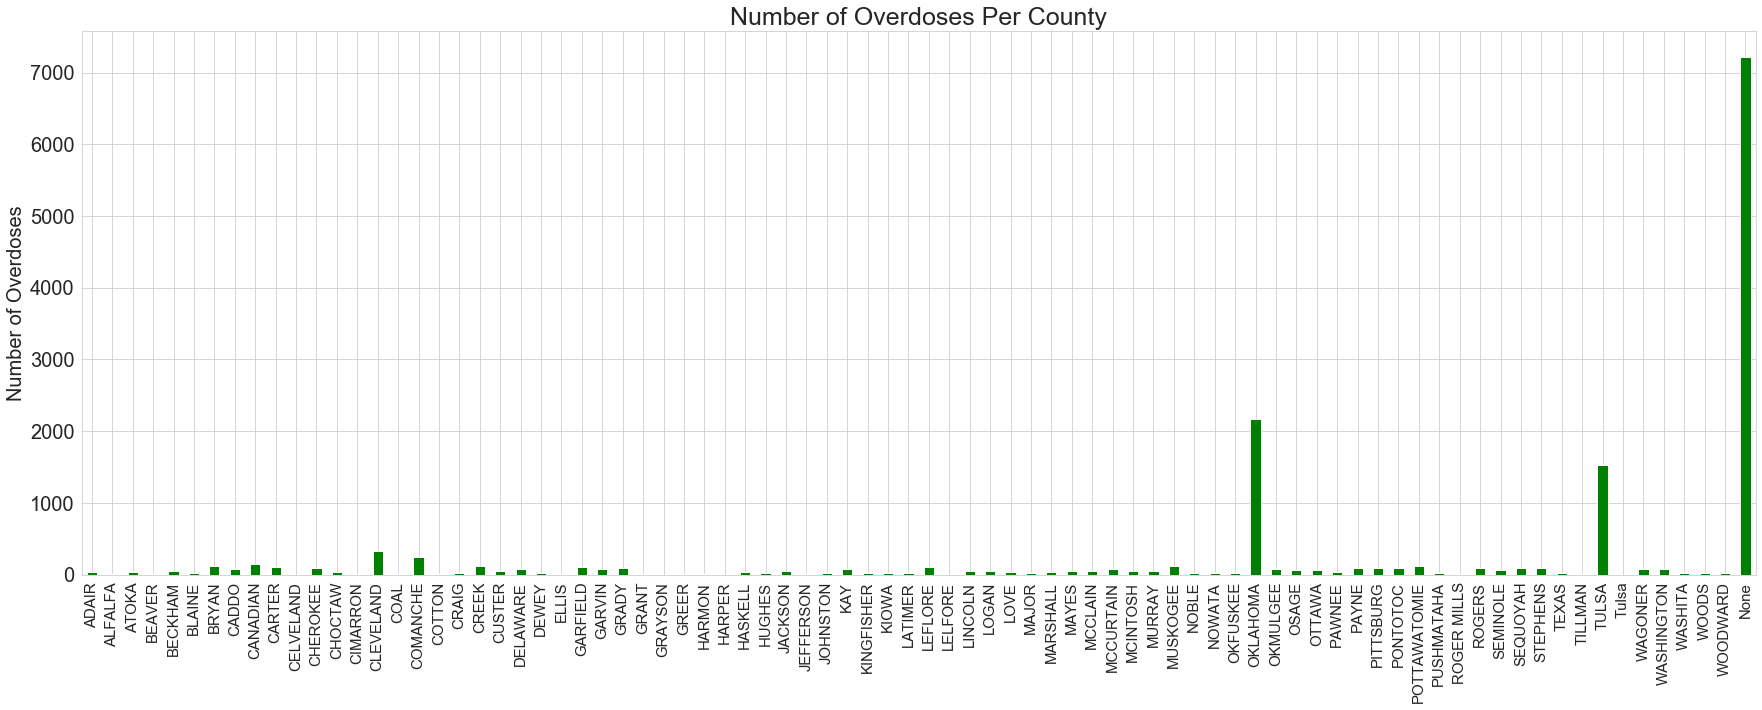

In [44]:
number_of_overdoses_per_county = number_of_overdoses_per_county.sort_values(by = "county")

number_of_overdoses_per_county.plot(figsize = (30,10), kind = "bar", color = "green", x = "county", y = "count", legend = False)

plt.xlabel("", fontsize = 20)
plt.ylabel("Number of Overdoses Deaths", fontsize = 20)
plt.title("Number of Overdoses Deaths Per County", fontsize = 25)
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.savefig('OUTPUTS/fig1')
plt.show()

In [45]:
overdoses.where((overdoses["ToxResults"] == "TRAMADOL") & (overdoses["IBIAState"] == "OK") &  (overdoses["MODAccident"] == "True"))\
.count()


6

In [46]:
columns = ['ToxResults','IBIACity','IBIACounty','IBIAState']
overdoses.where((overdoses["ToxResults"] == "TRAMADOL") & (overdoses["IBIAState"] == "OK") &  (overdoses["MODAccident"] == "True"))\
.select(columns).show(10)

+----------+-------------+----------+---------+
|ToxResults|     IBIACity|IBIACounty|IBIAState|
+----------+-------------+----------+---------+
|  TRAMADOL|MOUNTAIN PARK|     KIOWA|       OK|
|  TRAMADOL|   TISHOMINGO|  JOHNSTON|       OK|
|  TRAMADOL| BROKEN ARROW|     TULSA|       OK|
|  TRAMADOL|     RINGLING| JEFFERSON|       OK|
|  TRAMADOL|        PERRY|     NOBLE|       OK|
|  TRAMADOL|     KINGSTON|  MARSHALL|       OK|
+----------+-------------+----------+---------+



In [47]:
overdoses.where((overdoses["ToxResults"] == "METHADONE") & (overdoses["IBIAState"] == "OK") &  (overdoses["MODAccident"] == "True"))\
.count()

8

In [48]:
columns = ['ToxResults','IBIACity','IBIACounty','IBIAState']
overdoses.where((overdoses["ToxResults"] == "METHADONE") & (overdoses["IBIAState"] == "OK") &  (overdoses["MODAccident"] == "True"))\
.select(columns).show(10)

+----------+-------------+----------+---------+
|ToxResults|     IBIACity|IBIACounty|IBIAState|
+----------+-------------+----------+---------+
| METHADONE|OKLAHOMA CITY|  OKLAHOMA|       OK|
| METHADONE|      BETHANY|  OKLAHOMA|       OK|
| METHADONE|      ARDMORE|    CARTER|       OK|
| METHADONE|OKLAHOMA CITY|  OKLAHOMA|       OK|
| METHADONE|        TULSA|     TULSA|       OK|
| METHADONE|OKLAHOMA CITY|  OKLAHOMA|       OK|
| METHADONE|      CLINTON|    CUSTER|       OK|
| METHADONE|     GLENPOOL|     TULSA|       OK|
+----------+-------------+----------+---------+



In [49]:
overdoses.groupBy("LODCounty").count().show(1000)

+------------+-----+
|   LODCounty|count|
+------------+-----+
|       TULSA| 1527|
|     LATIMER|   21|
|     LEFLORE|   99|
|       ELLIS|    6|
|   PITTSBURG|   89|
|    COMANCHE|  248|
|        COAL|   11|
|     JACKSON|   45|
|         KAY|   82|
|    STEPHENS|   90|
|       MAJOR|   16|
|       GRADY|   98|
|     BECKHAM|   51|
|       CADDO|   82|
|       KIOWA|   22|
|       TEXAS|   28|
|      MURRAY|   43|
|       BRYAN|  113|
|       ATOKA|   38|
|      BEAVER|   11|
|    OKLAHOMA| 2175|
|    SEMINOLE|   63|
|     TILLMAN|   13|
|      HUGHES|   28|
|       WOODS|   18|
|     LINCOLN|   53|
|      CUSTER|   55|
|    CHEROKEE|   87|
|       ADAIR|   32|
|    CANADIAN|  148|
|       DEWEY|   17|
|    OKFUSKEE|   29|
|   MCCURTAIN|   80|
|      GARVIN|   71|
|       LOGAN|   47|
|    PONTOTOC|   88|
|       CREEK|  116|
|    OKMULGEE|   77|
|    GARFIELD|  105|
|    DELAWARE|   84|
|   CLEVELAND|  330|
|    MARSHALL|   41|
|    MUSKOGEE|  117|
|      CARTER|  102|
|POTTAWATOMIE

In [50]:
overdose_location  = overdoses.groupBy("LODCounty").count().collect()
location = [item[0] for item in overdose_location]
count = [item[1] for item in overdose_location]
overdose_location = {"location" : location, "count": count}
overdose_location = pd.DataFrame(overdose_location)
overdose_location = overdose_location.sort_values(by = "count", ascending  = True)
overdose_location.iloc[1:100]

location  count
76        HARPER      1
79     CELVELAND      1
80       GRAYSON      1
77       LELFORE      1
63       ALFALFA      3
74      CIMARRON      4
55         GRANT      5
75        HARMON      5
71   ROGER MILLS      5
3          ELLIS      6
72         GREER      6
6           COAL     11
19        BEAVER     11
67        COTTON     11
22       TILLMAN     13
61     JEFFERSON     13
10         MAJOR     16
30         DEWEY     17
45         NOBLE     17
24         WOODS     18
65       WASHITA     20
69    KINGFISHER     20
1        LATIMER     21
14         KIOWA     22
48      JOHNSTON     22
58        NOWATA     22
60    PUSHMATAHA     23
73         CRAIG     24
50        BLAINE     25
66      WOODWARD     27
15         TEXAS     28
23        HUGHES     28
31      OKFUSKEE     29
68       HASKELL     30
28         ADAIR     32
52        PAWNEE     34
57       CHOCTAW     37
18         ATOKA     38
56          LOVE     39
41      MARSHALL     41
16        MURRAY     43
47      MCINTOSH     45
7        JACKSON     45
34         LOGAN     47
12       BECKHAM     51
25       LINCOLN     53
70       MCCLAIN     54
49         MAYES     54
26        CUSTER     55
21      SEMINOLE     63
59        OTTAWA     66
51         OSAGE     68
33        GARVIN     71
62       WAGONER     73
64    WASHINGTON     73
37      OKMULGEE     77
32     MCCURTAIN     80
13         CADDO     82
8            KAY     82
39      DELAWARE     84
46      SEQUOYAH     85
27      CHEROKEE     87
35      PONTOTOC     88
4      PITTSBURG     89
9       STEPHENS     90
54         PAYNE     92
53        ROGERS     93
11         GRADY     98
2        LEFLORE     99
43        CARTER    102
38      GARFIELD    105
17         BRYAN    113
36         CREEK    116
42      MUSKOGEE    117
44  POTTAWATOMIE    125
29      CANADIAN    148
5       COMANCHE    248
40     CLEVELAND    330
0          TULSA   1527
20      OKLAHOMA   2175
81          None   7218

In [51]:
overdoses.agg({"LODCounty": "count"}).show()

+----------------+
|count(LODCounty)|
+----------------+
|            7921|
+----------------+



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

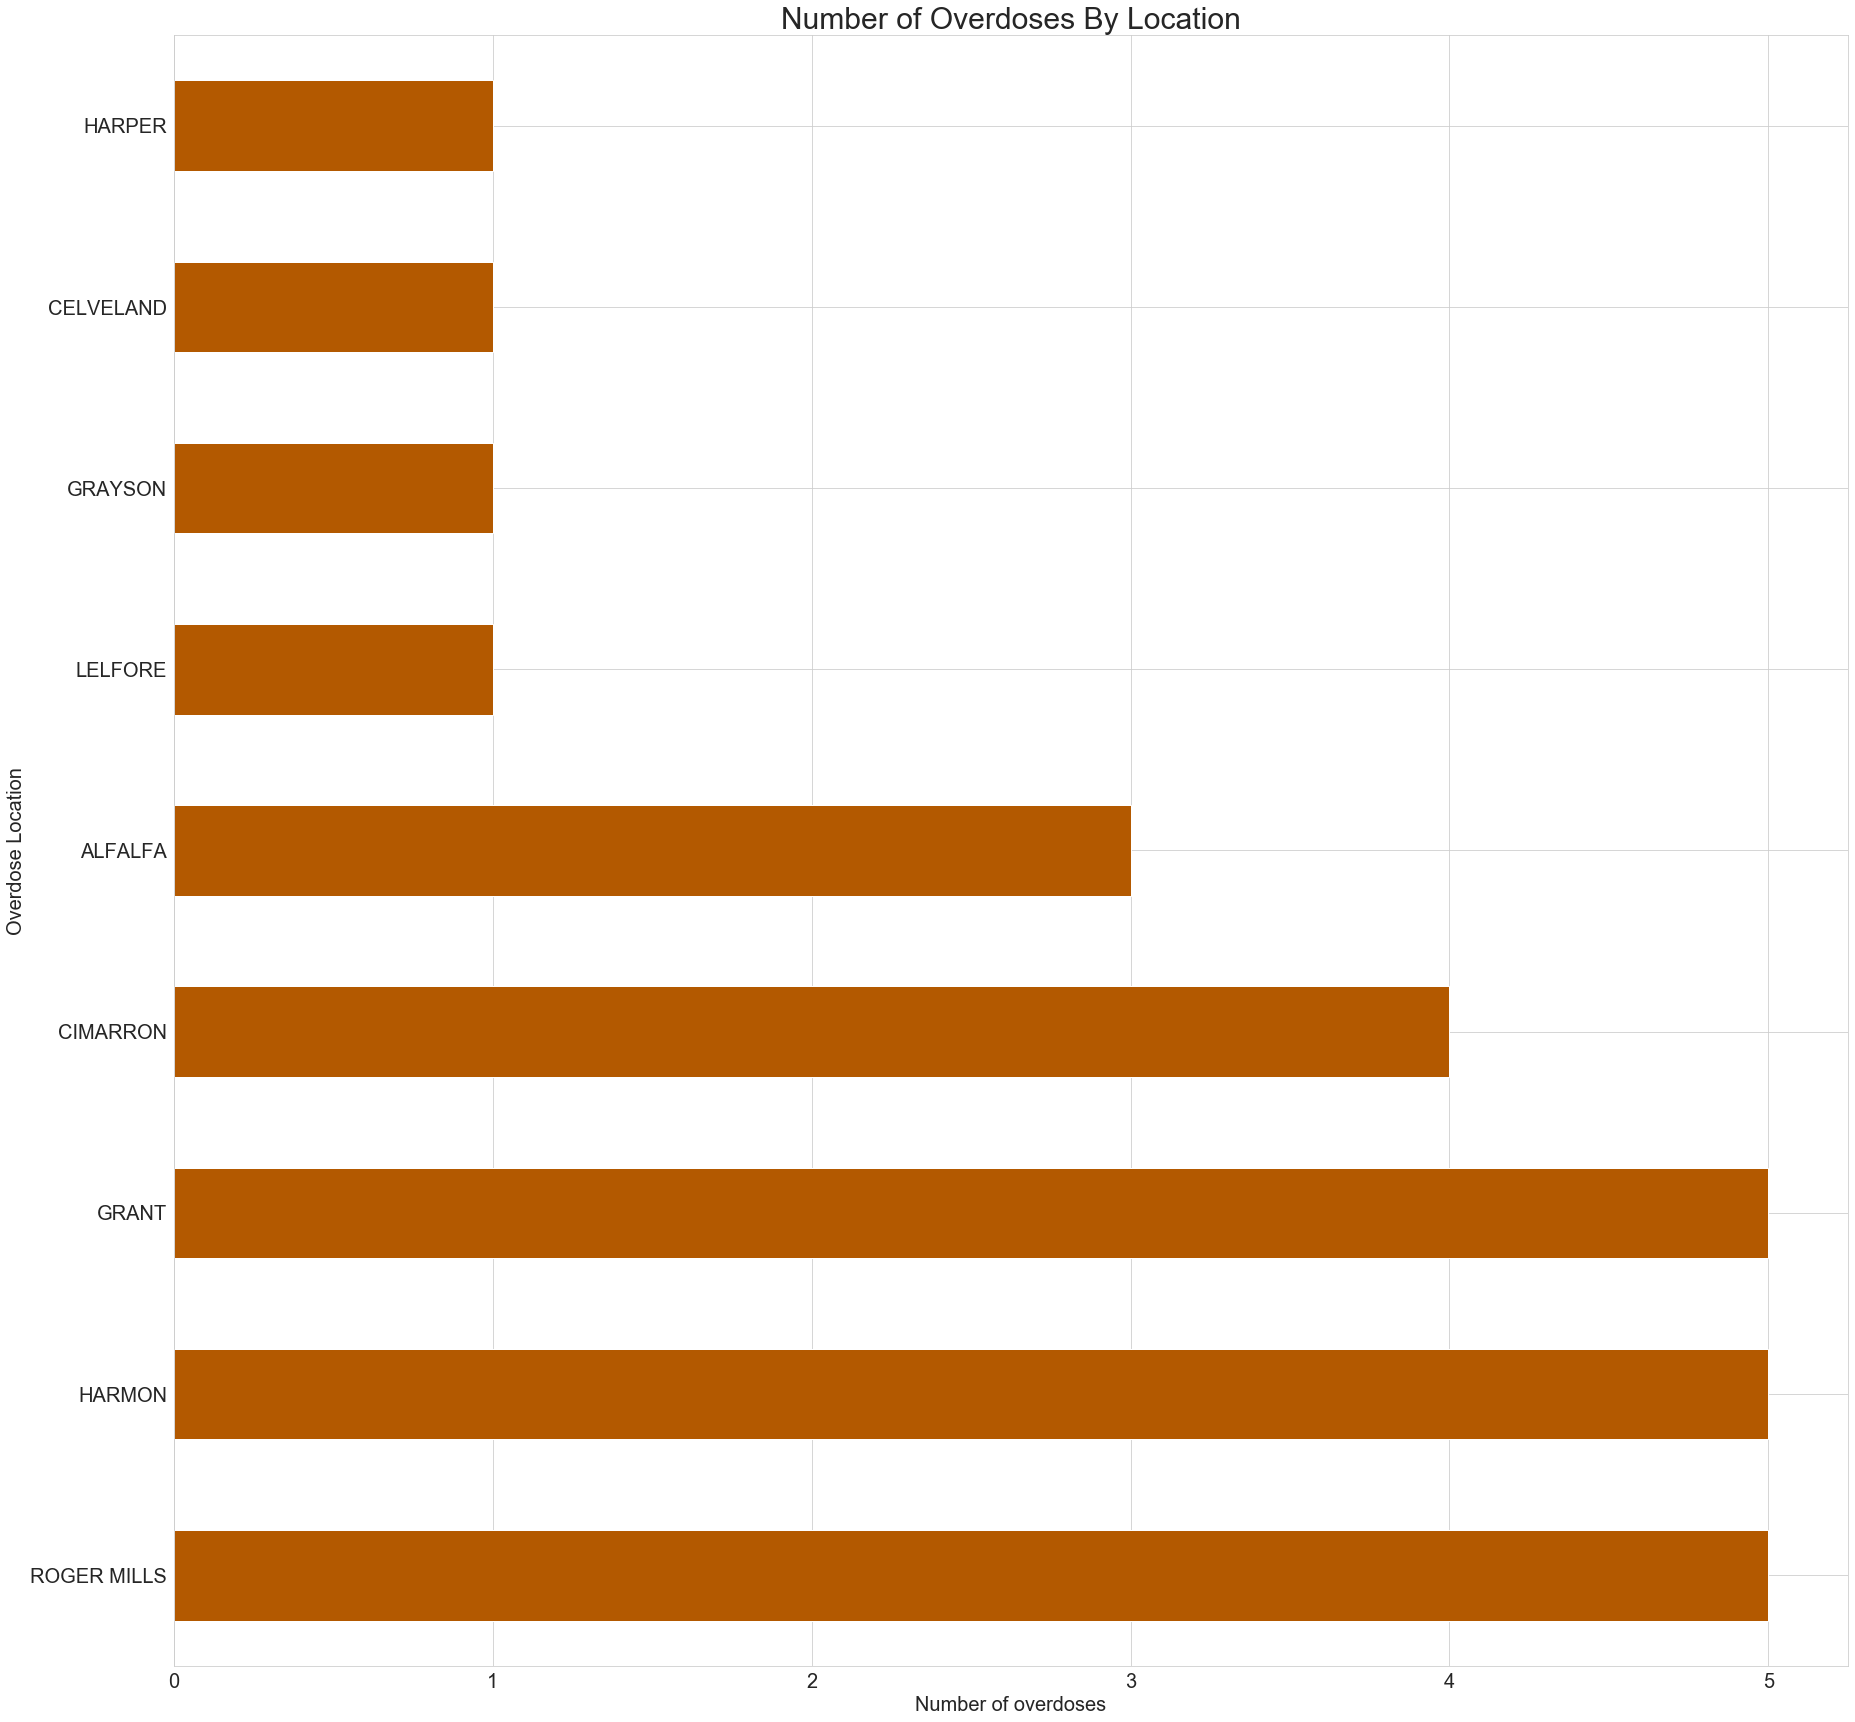

In [52]:
overdose_location = overdose_location.iloc[1:10]

myplot = overdose_location .plot(figsize = (30,30), kind = "barh", color = "#b35900", width = 0.5,
                               x = "location", y = "count", legend = False)

myplot.invert_yaxis()
plt.xlabel("Number of overdoses", fontsize = 20)
plt.ylabel("Overdose Location", fontsize = 20)
plt.title("Number of Overdoses By Location", fontsize = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.show()

In [53]:
overdoses.groupby('LODCounty', 'LODDate').agg(fun.count('LODCounty').alias('count')).show(10)


+---------+----------+-----+
|LODCounty|   LODDate|count|
+---------+----------+-----+
|    TULSA|2020-10-02|    3|
|  LATIMER|2019-11-30|    1|
|  LEFLORE|2019-07-27|    1|
|    TULSA|2019-08-31|    2|
|    ELLIS|2020-01-29|    1|
|PITTSBURG|2019-10-01|    1|
|    TULSA|2019-10-28|    5|
|    TULSA|2019-06-07|    2|
| COMANCHE|2019-09-02|    2|
|     COAL|2019-05-12|    1|
+---------+----------+-----+
only showing top 10 rows



** Overdoses per County **

## Total Number of OVERDOSES DEATHS per DATE & COUNTY in OK STATE ##

In [54]:
aggDFprime = overdoses.groupby('LODCounty', 'LODDate').agg(fun.count('MODAccident').alias('Overdose_Deaths')).orderBy('Overdose_Deaths', ascending=False)
aggDFprime.show(1000)
aggDFprime.toPandas().to_csv('OUTPUTS/Total_number_OverdoseDeaths_Per_Date_&_County_OK.csv', index=False)

+------------+----------+---------------+
|   LODCounty|   LODDate|Overdose_Deaths|
+------------+----------+---------------+
|    OKLAHOMA|2020-05-11|             15|
|    OKLAHOMA|2019-08-27|             12|
|    OKLAHOMA|2019-06-15|             11|
|    OKLAHOMA|2019-09-17|             11|
|    OKLAHOMA|2020-05-26|             11|
|    OKLAHOMA|2020-06-27|             10|
|    OKLAHOMA|2019-06-26|             10|
|    OKLAHOMA|2020-01-03|             10|
|    OKLAHOMA|2019-08-08|             10|
|    OKLAHOMA|2020-06-29|             10|
|    OKLAHOMA|2020-08-23|             10|
|    OKLAHOMA|2019-07-14|             10|
|    OKLAHOMA|2020-07-10|             10|
|    OKLAHOMA|2019-06-09|              9|
|    OKLAHOMA|2020-01-08|              9|
|    OKLAHOMA|2020-05-21|              9|
|    OKLAHOMA|2019-10-04|              9|
|       TULSA|2019-12-20|              9|
|    OKLAHOMA|2019-11-29|              9|
|    OKLAHOMA|2019-08-30|              9|
|    OKLAHOMA|2019-12-25|         

In [55]:
# first Extract the month and year from the date column, and Second directly use SQL query to interact with PySpark DataFrame
split_col = S.split(overdoses['LODDate'], ' ')
overdoses = overdoses.withColumn('Day', split_col.getItem(0))
split_col = S.split(overdoses['Day'], '-')
overdoses = overdoses.withColumn('Month', split_col.getItem(1))
overdoses = overdoses.withColumn('Year', split_col.getItem(0))
overdoses.createOrReplaceTempView('aggDFprime')

sql_query1 = (""" SELECT Month, COUNT(*) AS Count FROM aggDFprime GROUP BY Month ORDER BY Month """)
sql_query2 = (""" SELECT Year, COUNT(*) AS Count FROM aggDFprime GROUP BY Year ORDER BY Year """)

count_month = spark.sql(sql_query1).toPandas().dropna()
count_year = spark.sql(sql_query2).toPandas().dropna()
count_month.to_csv('OUTPUTS/County_count_month.csv', index = False)
count_year.to_csv('OUTPUTS/count_year.csv', index = False)

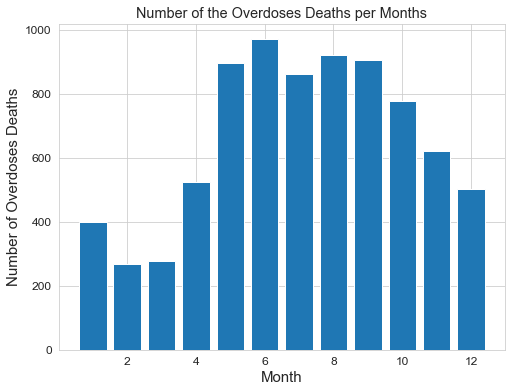

In [73]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
plt.bar(count_month['Month'].astype('float64'), count_month['Count'])
plt.title('Number of the Overdoses Deaths per Months')
plt.ylabel("Number of Overdoses Deaths", fontsize = 15)
plt.xlabel("Month", fontsize = 15)
plt.savefig('OUTPUTS/fig2')

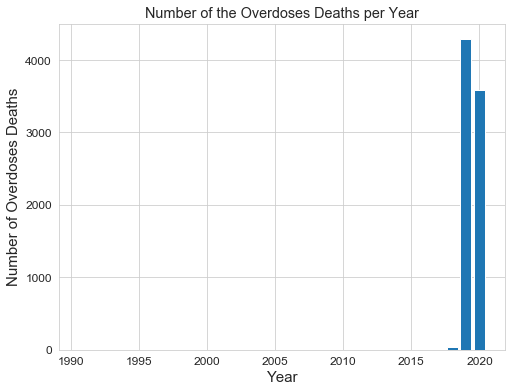

In [74]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
plt.bar(count_year['Year'].astype('float64'), count_year['Count'])
plt.title('Number of the Overdoses Deaths per Year')
plt.ylabel("Number of Overdoses Deaths", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.savefig('OUTPUTS/fig3')

## Number of Overdoses deaths by OPIOIDS per County in OK ## 

In [56]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Opioids_Overdoses_Deaths')).orderBy('LODCounty', 'Opioids_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "TRAMADOL") | (aggDF["ToxResults"] == "CODEINE") | (aggDF["ToxResults"] == "ACETYLFENTANYL") | (aggDF["ToxResults"] == "HYDROCODONE")\
| (aggDF["ToxResults"] == "HYDROMORPHONE") | (aggDF["ToxResults"] == "LOPERAMIDE") | (aggDF["ToxResults"] == "METHADONE")\
| (aggDF["ToxResults"] == "MORPHINE") | (aggDF["ToxResults"] == "OXYCODONE") | (aggDF["ToxResults"] == "OXYMORPHONE") \
| (aggDF["ToxResults"] == "FENTANYL") | (aggDF["ToxResults"] == "MITRAGYNINE"))
aggDF.show(1000)
aggDF.agg(sum("Opioids_Overdoses_Deaths").alias('Total Number of overdoses deaths by Opioids per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/OPIOIDS/OPIOIDS_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+------------+----------+-------------+------------------------+
|   LODCounty|   LODDate|   ToxResults|Opioids_Overdoses_Deaths|
+------------+----------+-------------+------------------------+
|     WASHITA|2018-06-02|  HYDROCODONE|                       1|
|  WASHINGTON|2020-10-01|    OXYCODONE|                       1|
|  WASHINGTON|2020-03-26|    OXYCODONE|                       1|
|     WAGONER|2020-07-20|  HYDROCODONE|                       1|
|     WAGONER|2019-02-02|    OXYCODONE|                       1|
|     WAGONER|2019-11-24|    OXYCODONE|                       1|
|     WAGONER|2019-12-16|  HYDROCODONE|                       1|
|       TULSA|2019-08-27|  HYDROCODONE|                       2|
|       TULSA|2020-09-15|  HYDROCODONE|                       1|
|       TULSA|2020-03-31|    METHADONE|                       1|
|       TULSA|2020-06-01|     FENTANYL|                       1|
|       TULSA|2019-03-24|    OXYCODONE|                       1|
|       TULSA|2019-09-26|

+------------------------------------------------------------+
|Total Number of overdoses deaths by Opioids per County in OK|
+------------------------------------------------------------+
|                                                         289|
+------------------------------------------------------------+



## Number of Overdoses deaths by STIMULANT per County in OK ## 

In [57]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Stimulants_Overdoses_Deaths')).orderBy('LODCounty', 'Stimulants_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "AMPHETAMINE") | (aggDF["ToxResults"] == "COCAINE") | (aggDF["ToxResults"] == "EPHEDRINE") | (aggDF["ToxResults"] == "PSEUDOEPHEDRINE")\
| (aggDF["ToxResults"] == "METHAMPHETAMINE") | (aggDF["ToxResults"] == "METHYLENEDIOXYMETHAMPHETAMINE") | (aggDF["ToxResults"] == "PHENTERMINE")\
| (aggDF["ToxResults"] == "PSEUDOEPEDRINE") | (aggDF["ToxResults"] == "EPHEDRINE") | (aggDF["ToxResults"] == "TENOCYCLIDINE") \
| (aggDF["ToxResults"] == "PHENDIMETRAZINE"))
aggDF.show(1000)
aggDF.agg(sum("Stimulants_Overdoses_Deaths").alias('Total Number of overdoses deaths by Stimulant per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/STIMULANTS/STIMULANTS_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+------------+----------+--------------------+---------------------------+
|   LODCounty|   LODDate|          ToxResults|Stimulants_Overdoses_Deaths|
+------------+----------+--------------------+---------------------------+
|    WOODWARD|2019-05-07|     METHAMPHETAMINE|                          1|
|    WOODWARD|2020-06-19|     METHAMPHETAMINE|                          1|
|    WOODWARD|2020-10-04|     METHAMPHETAMINE|                          1|
|       WOODS|2020-08-13|     METHAMPHETAMINE|                          1|
|       WOODS|2019-06-20|         AMPHETAMINE|                          1|
|     WASHITA|2020-05-05|         AMPHETAMINE|                          1|
|     WASHITA|2019-12-12|         AMPHETAMINE|                          1|
|  WASHINGTON|2019-09-23|         AMPHETAMINE|                          1|
|  WASHINGTON|2020-08-25|         AMPHETAMINE|                          1|
|  WASHINGTON|2020-08-13|     METHAMPHETAMINE|                          1|
|  WASHINGTON|2019-05-21|

+--------------------------------------------------------------+
|Total Number of overdoses deaths by Stimulant per County in OK|
+--------------------------------------------------------------+
|                                                           954|
+--------------------------------------------------------------+



## Number of Overdoses deaths by BENZOS per County in OK ## 

In [58]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Benzos_Overdoses_Deaths')).orderBy('LODCounty', 'Benzos_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "ALPRAZOLAM") | (aggDF["ToxResults"] == "CHLORDIAZEPOXIDE") | (aggDF["ToxResults"] == "CLONAZEPAM") | (aggDF["ToxResults"] == "DIAZEPAM")\
| (aggDF["ToxResults"] == "FLUALPRAZOLAM") | (aggDF["ToxResults"] == "MIDAZOLAM") | (aggDF["ToxResults"] == "TEMAZEPAM")\
| (aggDF["ToxResults"] == "DESALKYLFLURAZEPAM") | (aggDF["ToxResults"] == "NORDIAZEPAM") | (aggDF["ToxResults"] == "FLUBROMAZOLAM") \
| (aggDF["ToxResults"] == "ETIZOLAM")| (aggDF["ToxResults"] == "BENZODIAZEPINE"))
aggDF.show(1000)
aggDF.agg(sum("Benzos_Overdoses_Deaths").alias('Total Number of overdoses deaths by Bensoz per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/BENZOS/BENZOS_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+------------+----------+------------------+-----------------------+
|   LODCounty|   LODDate|        ToxResults|Benzos_Overdoses_Deaths|
+------------+----------+------------------+-----------------------+
|     WASHITA|2020-03-22|  CHLORDIAZEPOXIDE|                      1|
|  WASHINGTON|2019-10-13|        ALPRAZOLAM|                      1|
|     WAGONER|2019-07-19|        ALPRAZOLAM|                      1|
|       TULSA|2019-05-08|       NORDIAZEPAM|                      2|
|       TULSA|2020-03-26|     FLUALPRAZOLAM|                      1|
|       TULSA|2020-04-16|         MIDAZOLAM|                      1|
|       TULSA|2020-04-29|         MIDAZOLAM|                      1|
|       TULSA|2020-03-30|        ALPRAZOLAM|                      1|
|       TULSA|2019-11-05|        ALPRAZOLAM|                      1|
|       TULSA|2019-09-05|        ALPRAZOLAM|                      1|
|       TULSA|2020-04-28|         MIDAZOLAM|                      1|
|       TULSA|2019-05-13|        A

## Number of Overdoses deaths by Muscle Relaxants per County in OK ## 

In [59]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Musclerelaxents_Overdoses_Deaths')).orderBy('LODCounty', 'Musclerelaxents_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "BACLOFEN") | (aggDF["ToxResults"] == "CYCLOBENZAPRINE"))
aggDF.show(10)
aggDF.agg(sum("Musclerelaxents_Overdoses_Deaths").alias('Total Number of overdoses deaths by Muscle Relaxents per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/MUSCLERELAXENTS/MUSCLERELAXENTS_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+------------+----------+---------------+--------------------------------+
|   LODCounty|   LODDate|     ToxResults|Musclerelaxents_Overdoses_Deaths|
+------------+----------+---------------+--------------------------------+
|       TULSA|2019-07-20|CYCLOBENZAPRINE|                               1|
|       TULSA|2020-08-18|CYCLOBENZAPRINE|                               1|
|POTTAWATOMIE|2019-05-10|CYCLOBENZAPRINE|                               1|
|    PONTOTOC|2020-05-19|       BACLOFEN|                               1|
|    OKMULGEE|2019-12-20|CYCLOBENZAPRINE|                               1|
|       MAYES|2019-07-27|CYCLOBENZAPRINE|                               1|
|       GRADY|2019-09-15|CYCLOBENZAPRINE|                               1|
|   CLEVELAND|2019-07-10|CYCLOBENZAPRINE|                               1|
|    CHEROKEE|2019-12-03|CYCLOBENZAPRINE|                               1|
|       BRYAN|2019-09-25|CYCLOBENZAPRINE|                               1|
+------------+----------+

## Number of Overdoses deaths by Cocaine per County in OK ## 

In [60]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Cocaine_Overdoses_Deaths')).orderBy('LODCounty', 'Cocaine_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "BENZOYLECGONINE") | (aggDF["ToxResults"] == "COCAETHYLENE"))
aggDF.show(10)
aggDF.agg(sum("Cocaine_Overdoses_Deaths").alias('Total Number of overdoses deaths by Cocaine per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/COCAINE/COCAINE_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+---------------+------------------------+
|LODCounty|   LODDate|     ToxResults|Cocaine_Overdoses_Deaths|
+---------+----------+---------------+------------------------+
|    TULSA|2019-04-16|BENZOYLECGONINE|                       1|
|    TULSA|2020-04-21|BENZOYLECGONINE|                       1|
|    TULSA|2020-05-07|BENZOYLECGONINE|                       1|
|    TULSA|2020-03-07|BENZOYLECGONINE|                       1|
|    PAYNE|2019-12-30|BENZOYLECGONINE|                       1|
| OKLAHOMA|2020-06-15|BENZOYLECGONINE|                       1|
| OKLAHOMA|2019-12-24|BENZOYLECGONINE|                       1|
| OKLAHOMA|2020-04-22|   COCAETHYLENE|                       1|
| OKLAHOMA|2019-11-29|BENZOYLECGONINE|                       1|
| OKLAHOMA|2020-05-03|BENZOYLECGONINE|                       1|
+---------+----------+---------------+------------------------+
only showing top 10 rows

+------------------------------------------------------------+
|Total Number o

## Number of Overdoses deaths by Barbiturates per County in OK ## 

In [61]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Barbiturates_Overdoses_Deaths')).orderBy('LODCounty', 'Barbiturates_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "BUTALBITAL") | (aggDF["ToxResults"] == "PENTOBARBITAL") | (aggDF["ToxResults"] == "PHENOBARBITAL"))
aggDF.show(10)
aggDF.agg(sum("Barbiturates_Overdoses_Deaths").alias('Total Number of overdoses deaths by Barbiturates per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/BARBITURATES/BARBITURATES_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+-------------+-----------------------------+
|LODCounty|   LODDate|   ToxResults|Barbiturates_Overdoses_Deaths|
+---------+----------+-------------+-----------------------------+
| OKLAHOMA|2019-12-11|   BUTALBITAL|                            1|
| OKLAHOMA|2019-09-17|   BUTALBITAL|                            1|
|    LOGAN|2019-04-23|PENTOBARBITAL|                            1|
+---------+----------+-------------+-----------------------------+

+-----------------------------------------------------------------+
|Total Number of overdoses deaths by Barbiturates per County in OK|
+-----------------------------------------------------------------+
|                                                                3|
+-----------------------------------------------------------------+



## Number of Overdoses deaths by Inhalents per County in OK ##

In [62]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Inhalents_Overdoses_Deaths')).orderBy('LODCounty', 'Inhalents_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "DIFLUOROETHANE") | (aggDF["ToxResults"] == "NORFLURANE") | (aggDF["ToxResults"] == "TOLUENE"))
aggDF.show(10)
aggDF.agg(sum("Inhalents_Overdoses_Deaths").alias('Total Number of overdoses deaths by Inhalents per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/INHALENTS/INHALENTS_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+--------------+--------------------------+
|LODCounty|   LODDate|    ToxResults|Inhalents_Overdoses_Deaths|
+---------+----------+--------------+--------------------------+
|    TULSA|2019-05-25|DIFLUOROETHANE|                         1|
|    TULSA|2020-08-15|DIFLUOROETHANE|                         1|
|    PAYNE|2020-08-14|DIFLUOROETHANE|                         1|
| OKLAHOMA|2019-07-23|    NORFLURANE|                         1|
| OKLAHOMA|2020-07-10|DIFLUOROETHANE|                         1|
|  JACKSON|2019-05-11|DIFLUOROETHANE|                         1|
|    GRADY|2020-02-25|DIFLUOROETHANE|                         1|
| CANADIAN|2020-06-01|DIFLUOROETHANE|                         1|
|    ATOKA|2019-03-29|       TOLUENE|                         1|
|    ADAIR|2020-07-01|DIFLUOROETHANE|                         1|
+---------+----------+--------------+--------------------------+

+--------------------------------------------------------------+
|Total Number of overdos

## Number of Overdoses deaths by Dissociative per County in OK ## 

In [63]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Dissociative_Overdoses_Deaths')).orderBy('LODCounty', 'Dissociative_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "DEXTROMETHORPHAN") | (aggDF["ToxResults"] == "KETAMINE") | (aggDF["ToxResults"] == "PHENCYCLIDINE"))
aggDF.show(10)
aggDF.agg(sum("Dissociative_Overdoses_Deaths").alias('Total Number of overdoses deaths by Dissociative per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/DISSOCIATIVE/DISSOCIATIVE_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+-------------+-----------------------------+
|LODCounty|   LODDate|   ToxResults|Dissociative_Overdoses_Deaths|
+---------+----------+-------------+-----------------------------+
|    TULSA|2019-05-29|PHENCYCLIDINE|                            1|
|    TULSA|2020-08-05|PHENCYCLIDINE|                            1|
|    TULSA|2020-03-27|PHENCYCLIDINE|                            1|
|    TULSA|2020-04-22|     KETAMINE|                            1|
|    TULSA|2020-01-23|PHENCYCLIDINE|                            1|
|    TULSA|2019-06-09|PHENCYCLIDINE|                            1|
|    PAYNE|2019-11-03|PHENCYCLIDINE|                            1|
|    OSAGE|2019-09-20|PHENCYCLIDINE|                            1|
| OKMULGEE|2020-05-06|PHENCYCLIDINE|                            1|
| OKLAHOMA|2020-10-30|PHENCYCLIDINE|                            1|
+---------+----------+-------------+-----------------------------+
only showing top 10 rows

+-----------------------------------

## Number of Overdoses deaths by Toxin per County in OK ##

In [64]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Toxin_Overdoses_Deaths')).orderBy('LODCounty', 'Toxin_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "STRYCHNINE"))
aggDF.show(10)
aggDF.agg(sum("Toxin_Overdoses_Deaths").alias('Total Number of overdoses deaths by Toxin per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/TOXIN/TOXIN_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+----------+----------------------+
|LODCounty|   LODDate|ToxResults|Toxin_Overdoses_Deaths|
+---------+----------+----------+----------------------+
| OKLAHOMA|2020-01-12|STRYCHNINE|                     1|
+---------+----------+----------+----------------------+

+----------------------------------------------------------+
|Total Number of overdoses deaths by Toxin per County in OK|
+----------------------------------------------------------+
|                                                         1|
+----------------------------------------------------------+



## Number of Overdoses deaths by Sedative per County in OK ##

In [65]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Sedative_Overdoses_Deaths')).orderBy('LODCounty', 'Sedative_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "ZOLPIDEM")|(aggDF["ToxResults"] == "GAMMA HYDROXYBUTYRATE"))
aggDF.show(10)
aggDF.agg(sum("Sedative_Overdoses_Deaths").alias('Total Number of overdoses deaths by Toxin per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/SEDATIVE/SEDATIVE_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+----------+----------+-------------------------+
|LODCounty|   LODDate|ToxResults|Sedative_Overdoses_Deaths|
+---------+----------+----------+-------------------------+
|    TULSA|2019-10-11|  ZOLPIDEM|                        1|
|    TULSA|2019-08-23|  ZOLPIDEM|                        1|
|    TULSA|2019-09-03|  ZOLPIDEM|                        1|
| OKLAHOMA|2019-05-12|  ZOLPIDEM|                        1|
|  MCCLAIN|2019-10-13|  ZOLPIDEM|                        1|
|  MCCLAIN|2020-05-11|  ZOLPIDEM|                        1|
| COMANCHE|2019-07-07|  ZOLPIDEM|                        1|
|CLEVELAND|2020-04-26|  ZOLPIDEM|                        1|
|    BRYAN|2019-07-30|  ZOLPIDEM|                        1|
+---------+----------+----------+-------------------------+

+----------------------------------------------------------+
|Total Number of overdoses deaths by Toxin per County in OK|
+----------------------------------------------------------+
|                                   

## Number of Overdoses deaths by Alcohol per County in OK ##

In [66]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Alcohol_Overdoses_Deaths')).orderBy('LODCounty', 'Alcohol_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "ALCOHOL"))
aggDF.show(10)
aggDF.agg(sum("Alcohol_Overdoses_Deaths").alias('Total Number of overdoses deaths by Alcohol per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/ALCOHOL/ALCOHOL_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+---------+-------+----------+------------------------+
|LODCounty|LODDate|ToxResults|Alcohol_Overdoses_Deaths|
+---------+-------+----------+------------------------+
+---------+-------+----------+------------------------+

+------------------------------------------------------------+
|Total Number of overdoses deaths by Alcohol per County in OK|
+------------------------------------------------------------+
|                                                        null|
+------------------------------------------------------------+



## Number of Overdoses deaths by Therapeutic per County in OK ##

In [67]:
aggDF = overdoses.groupby('LODCounty','LODDate', 'ToxResults').agg(fun.count('MODAccident').alias('Therapeutic_Overdoses_Deaths')).orderBy('LODCounty', 'Therapeutic_Overdoses_Deaths', ascending=False)
aggDF = aggDF.filter((aggDF["ToxResults"] == "ACETAMINOPHEN")|(aggDF["ToxResults"] == "ACETONE")|(aggDF["ToxResults"] == "ALKALINE")|(aggDF["ToxResults"] == "AMANTADINE")|(aggDF["ToxResults"] == "AMITRIPTYLINE")\
|(aggDF["ToxResults"] == "AMLODIPINE")|(aggDF["ToxResults"] == "ATROPINE")|(aggDF["ToxResults"] == "BUPROPION")|(aggDF["ToxResults"] == "CARBAMAZEPINE")|(aggDF["ToxResults"] == "CITALOPRAM")\
|(aggDF["ToxResults"] == "CLOPIDOGREL")|(aggDF["ToxResults"] == "CLOZAPINE")|(aggDF["ToxResults"] == "CYPROHEPTADINE")|(aggDF["ToxResults"] == "DESLORATADINE")|(aggDF["ToxResults"] == "DESMETHYLSERTRALINE")\
|(aggDF["ToxResults"] == "DESMETHYLVENLAFAXINE")|(aggDF["ToxResults"] == "DILTIAZEM")|(aggDF["ToxResults"] == "DIPHENHYDRAMINE")|(aggDF["ToxResults"] == "DOXEPIN")|(aggDF["ToxResults"] == "DOXYLAMINE")\
|(aggDF["ToxResults"] == "DULOXETINE")|(aggDF["ToxResults"] == "ETHYLENE GLYCOL")|(aggDF["ToxResults"] == "ETOMIDATE")|(aggDF["ToxResults"] == "FLECAINIDE")|(aggDF["ToxResults"] == "FLUCONAZOLE")\
|(aggDF["ToxResults"] == "FLUOXETINE")|(aggDF["ToxResults"] == "GABAPENTIN")|(aggDF["ToxResults"] == "HYDROXYCHLOROQUININE")|(aggDF["ToxResults"] == "HYDROXYZINE")|(aggDF["ToxResults"] == "IBUPROFEN")\
|(aggDF["ToxResults"] == "ISOPROPANOL")|(aggDF["ToxResults"] == "LACOSAMIDE")|(aggDF["ToxResults"] == "LAMOTRIGINE")|(aggDF["ToxResults"] == "LEVAMISOLE")|(aggDF["ToxResults"] == "LEVETIRACETAM")|(aggDF["ToxResults"] == "LIDOCAINE")|(aggDF["ToxResults"] == "MEMANTINE")|(aggDF["ToxResults"] == "METFORMIN")|(aggDF["ToxResults"] == "METHANE")|(aggDF["ToxResults"] == "METOCLOPRAMIDE")\
|(aggDF["ToxResults"] == "METOPROLOL")|(aggDF["ToxResults"] == "MEXILETINE")|(aggDF["ToxResults"] == "MIRTAZAPINE")|(aggDF["ToxResults"] == "MIRTAZEPINE")|(aggDF["ToxResults"] == "NAPROXEN")\
|(aggDF["ToxResults"] == "NORCHLORCYCLIZINE")|(aggDF["ToxResults"] == "NORCYCLOBENZAPRINE")|(aggDF["ToxResults"] == "NORFLUOXETINE")|(aggDF["ToxResults"] == "NORFLURANE")|(aggDF["ToxResults"] == "NORTRIPTYLINE")\
|(aggDF["ToxResults"] == "OLANZAPINE")|(aggDF["ToxResults"] == "")|(aggDF["ToxResults"] == "")|(aggDF["ToxResults"] == "")|(aggDF["ToxResults"] == "")\
|(aggDF["ToxResults"] == "OMEPRAZOLE")|(aggDF["ToxResults"] == "PANTOPRAZOLE")|(aggDF["ToxResults"] == "PAROXETINE")|(aggDF["ToxResults"] == "PHENYTOIN")|(aggDF["ToxResults"] == "PRIMIDONE")\
|(aggDF["ToxResults"] == "PROMETHAZINE")|(aggDF["ToxResults"] == "PROPANE")|(aggDF["ToxResults"] == "PROPOFOL")|(aggDF["ToxResults"] == "PROPRANOLOL")|(aggDF["ToxResults"] == "QUETIAPINE")\
|(aggDF["ToxResults"] == "SERTRALINE")|(aggDF["ToxResults"] == "TOPIRAMATE")|(aggDF["ToxResults"] == "TRIMETHOPRIM")|(aggDF["ToxResults"] == "VALPROIC")|(aggDF["ToxResults"] == "VENLAFAXINE")\
|(aggDF["ToxResults"] == "VERAPAMIL")|(aggDF["ToxResults"] == "ZINC")|(aggDF["ToxResults"] == "ZIPRASIDONE")|(aggDF["ToxResults"] == "SILDENAFIL")|(aggDF["ToxResults"] == "AMBROXOL")\
|(aggDF["ToxResults"] == "TRAZODONE")|(aggDF["ToxResults"] == "ORPHENADRINE")|(aggDF["ToxResults"] == "ZONISAMIDE")|(aggDF["ToxResults"] == "BUPIVACAINE")|(aggDF["ToxResults"] == "ROPIVACAINE")\
|(aggDF["ToxResults"] == "CHLORPHENIRAMINE")|(aggDF["ToxResults"] == "PAPAVERINE")|(aggDF["ToxResults"] == "ROPIVACAINE")|(aggDF["ToxResults"] == "RANOLAZINE"))
aggDF.show(100)
aggDF.agg(sum("Therapeutic_Overdoses_Deaths").alias('Total Number of overdoses deaths by Therapeutic per County in OK')).show()
aggDF.toPandas().to_csv('OUTPUTS/THERAPEUTIC/THERAPEUTIC_OverdosesDeathsPerCounty_OK.csv', index=False) #<<<====== saved & genrated automatically

+------------+----------+-------------------+----------------------------+
|   LODCounty|   LODDate|         ToxResults|Therapeutic_Overdoses_Deaths|
+------------+----------+-------------------+----------------------------+
|    WOODWARD|2020-04-28|         PAROXETINE|                           1|
|  WASHINGTON|2019-08-21|            ACETONE|                           1|
|  WASHINGTON|2019-04-24|        VENLAFAXINE|                           1|
|  WASHINGTON|2019-07-02|            ACETONE|                           1|
|  WASHINGTON|2019-11-03|            ACETONE|                           1|
|  WASHINGTON|2019-05-15|         SERTRALINE|                           1|
|     WAGONER|2019-09-18|        VENLAFAXINE|                           1|
|     WAGONER|2019-05-12|          VERAPAMIL|                           1|
|     WAGONER|2019-07-13|          TRAZODONE|                           1|
|     WAGONER|2020-10-03|          MEMANTINE|                           1|
|     WAGONER|2019-05-15|

** This is a Master Project to read and analyze the ME_Repeorts ... Thanks! FADHIL ** 